<br>
Archivo para traer opciones de $BTC

# Datos

In [ ]:
pip install websockets


In [ ]:
pip install QuantLib

In [ ]:
pip install yahoofinancials

In [ ]:
pip install sklearn

In [ ]:
import requests
import pandas as pd
import asyncio
import websockets
import json
import QuantLib as ql
import math
import numpy as np
from datetime import datetime, date, timedelta
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from sklearn import preprocessing
from scipy.stats import norm

In [ ]:
"""from opcion_europea_bin import opcion_europea_bin
from opcion_europea_bin_c import opcion_europea_bin_c
from opcion_americana_bin import opcion_americana_bin
from opcion_europea_bs import opcion_europea_bs"""

'from opcion_europea_bin import opcion_europea_bin\nfrom opcion_europea_bin_c import opcion_europea_bin_c\nfrom opcion_americana_bin import opcion_americana_bin\nfrom opcion_europea_bs import opcion_europea_bs'

In [ ]:
def getBookSummaryAll(sym, kind):
    url = 'https://deribit.com/api/v2/public/get_book_summary_by_currency'
    p = {'currency': sym, 'kind': kind}
    r = requests.get(url, params=p)
    js = r.json()['result']
    df = pd.DataFrame(js)
    return df

In [ ]:
data = getBookSummaryAll('BTC', 'option')
data.loc[data.volume>0]

,volume,underlying_price,underlying_index,quote_currency,price_change,open_interest,mid_price,mark_price,low,last,interest_rate,instrument_name,high,estimated_delivery_price,creation_timestamp,bid_price,base_currency,ask_price
1,311.9,46926.232578,SYN.BTC-22DEC21,BTC,-46.6667,220.7,0.00450,0.004504,0.0040,0.0040,0.0,BTC-22DEC21-45000-P,0.0115,46914.54,1640041056047,0.0040,BTC,0.0050
2,39.1,47044.600000,BTC-31DEC21,BTC,-13.6364,92.5,0.00850,0.008476,0.0070,0.0095,0.0,BTC-31DEC21-55000-C,0.0110,46914.54,1640041056047,0.0080,BTC,0.0090
3,50.3,47253.330000,BTC-28JAN22,BTC,6.7961,1185.7,0.05100,0.051084,0.0455,0.0550,0.0,BTC-28JAN22-55000-C,0.0550,46914.54,1640041056047,0.0505,BTC,0.0515
5,1.4,47253.330000,BTC-28JAN22,BTC,8.3916,1902.5,0.14075,0.141311,0.1430,0.1550,0.0,BTC-28JAN22-50000-P,0.1550,46914.54,1640041056047,0.1395,BTC,0.1420
7,0.5,49814.920000,BTC-30SEP22,BTC,0.0000,381.0,0.15600,0.156035,0.1505,0.1505,0.0,BTC-30SEP22-80000-C,0.1505,46914.54,1640041056047,0.1535,BTC,0.1585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,13.5,47044.600000,BTC-31DEC21,BTC,0.0000,1788.2,NaN,0.000421,0.0005,0.0005,0.0,BTC-31DEC21-75000-C,0.0010,46914.54,1640041056055,NaN,BTC,0.0005
447,2.2,46917.673868,SYN.BTC-21DEC21,BTC,0.0000,20.2,NaN,0.000004,0.0005,0.0005,0.0,BTC-21DEC21-51000-C,0.0005,46914.54,1640041056055,NaN,BTC,0.0005
449,57.0,47836.990000,BTC-25MAR22,BTC,-1.7647,3209.2,0.01625,0.016348,0.0155,0.0167,0.0,BTC-25MAR22-100000-C,0.0170,46914.54,1640041056055,0.0160,BTC,0.0165
452,26.3,47044.600000,BTC-31DEC21,BTC,-12.2353,1206.0,0.09050,0.090035,0.0746,0.0746,0.0,BTC-31DEC21-44000-C,0.0850,46914.54,1640041056055,0.0870,BTC,0.0940


In [ ]:
panel_limpio = data[['instrument_name', 'underlying_price','volume', 'bid_price', 'ask_price', 'mid_price']]
panel_limpio

,instrument_name,underlying_price,volume,bid_price,ask_price,mid_price
0,BTC-21DEC21-53000-P,46917.673868,0.0,NaN,NaN,NaN
1,BTC-22DEC21-45000-P,46926.232578,311.9,0.0040,0.0050,0.0045
2,BTC-31DEC21-55000-C,47044.600000,39.1,0.0080,0.0090,0.0085
3,BTC-28JAN22-55000-C,47253.330000,50.3,0.0505,0.0515,0.0510
4,BTC-24JUN22-30000-C,48606.490000,0.0,0.4260,0.4580,0.4420
...,...,...,...,...,...,...
451,BTC-24DEC21-58000-P,46943.390000,0.0,0.0800,NaN,NaN
452,BTC-31DEC21-44000-C,47044.600000,26.3,0.0870,0.0940,0.0905
453,BTC-28JAN22-70000-P,47253.420000,0.0,0.2000,NaN,NaN
454,BTC-24DEC21-40000-C,46943.480000,0.0,0.0070,NaN,NaN


In [ ]:

Fechas=[]
Rango=[]
Dias=[]


In [ ]:
def monthToNum(shortMonth):
    return {
            'jan': 1,
            'feb': 2,
            'mar': 3,
            'apr': 4,
            'may': 5,
            'jun': 6,
            'jul': 7,
            'aug': 8,
            'sep': 9, 
            'oct': 10,
            'nov': 11,
            'dec': 12
    }[shortMonth]

In [ ]:
for i in range(11):
	Rango.append(str(i))

In [ ]:
j=[]
for i in range(len(panel_limpio['instrument_name'])):
  try:
    if int(data['instrument_name'][i][5:6]) in range(10):    
        
        Fechas.append(datetime(day=int(data['instrument_name'][i][4:6]),month=int(monthToNum(data['instrument_name'][i][6:9].lower())),year=int("20"+data['instrument_name'][i][9:11])))
        
        Dias.append((Fechas[i]-datetime.today()).days+1)
  except:
        Fechas.append(datetime(day=int(data['instrument_name'][i][4:5]),month=int(monthToNum(data['instrument_name'][i][5:8].lower())),year=int("20"+data['instrument_name'][i][8:10])))
        j.append(i)
        Dias.append((Fechas[i]-datetime.today()).days+1)
        continue
panel_limpio.insert(0, "Fecha_VTO",Fechas)
panel_limpio.insert(1, "Dias_al_VTO",Dias)


In [ ]:
strike=[]
tipo=[]
for i in range(len(panel_limpio['instrument_name'])):
          try:
              if int(data['instrument_name'][i][5:6]) in range(10):
                              strike.append(int(panel_limpio['instrument_name'][i][12:17]))
                              tipo.append(panel_limpio['instrument_name'][i][-1])
          except:
            strike.append(int(panel_limpio['instrument_name'][i][11:16]))
            tipo.append(panel_limpio['instrument_name'][i][-1])
          

panel_limpio.insert(2, "Strike",strike)
panel_limpio.insert(3, "Tipo",tipo)
print(panel_limpio)

     Fecha_VTO  Dias_al_VTO  Strike  ... bid_price ask_price  mid_price
0   2021-12-21            1   53000  ...       NaN       NaN        NaN
1   2021-12-22            2   45000  ...    0.0040    0.0050     0.0045
2   2021-12-31           11   55000  ...    0.0080    0.0090     0.0085
3   2022-01-28           39   55000  ...    0.0505    0.0515     0.0510
4   2022-06-24          186   30000  ...    0.4260    0.4580     0.4420
..         ...          ...     ...  ...       ...       ...        ...
451 2021-12-24            4   58000  ...    0.0800       NaN        NaN
452 2021-12-31           11   44000  ...    0.0870    0.0940     0.0905
453 2022-01-28           39   70000  ...    0.2000       NaN        NaN
454 2021-12-24            4   40000  ...    0.0070       NaN        NaN
455 2022-03-25           95   22000  ...    0.0085    0.0095     0.0090

[456 rows x 10 columns]


In [ ]:
fechas=[]
for i in range(len(panel_limpio['Fecha_VTO'])):
              if Fechas[i].day==1:
                  fechas.append("0"+str(Fechas[i].day)+"/"+str(Fechas[i].month)+"/"+str(Fechas[i].year))
              else:
                fechas.append(str(Fechas[i].day)+"/"+str(Fechas[i].month)+"/"+str(Fechas[i].year))


fechas=list(set(fechas))
strike=list(set(strike))
strike.sort()
print(fechas,strike)
Dias1=[]
for i in panel_limpio.Dias_al_VTO:
  Dias1.append(i)
Dias1=list(set(Dias1))  




['24/6/2022', '7/1/2022', '21/12/2021', '25/3/2022', '31/12/2021', '25/2/2022', '24/12/2021', '30/9/2022', '28/1/2022', '22/12/2021'] [10000, 11000, 12000, 14000, 15000, 16000, 18000, 20000, 22000, 24000, 25000, 26000, 28000, 30000, 32000, 34000, 35000, 36000, 38000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 58000, 60000, 62000, 64000, 65000, 66000, 68000, 70000, 75000, 80000, 85000, 90000, 95000]


In [ ]:
#print(panel_limpio.loc[[4]])
#panel_limpio.Strike[panel_limpio.Strike == 50000].index.tolist()

Dias2=panel_limpio.Dias_al_VTO[panel_limpio.Dias_al_VTO == 11].index.tolist()  
Strikes= panel_limpio.Strike[panel_limpio.Strike == 46000].index.tolist()
tipo2= panel_limpio.Tipo[panel_limpio.Tipo == "C"].index.tolist()
a=set(Dias2) & set(Strikes)
print(a)#Esta listo para borrar creo

{357, 181}


In [ ]:
def getprice(currency):
    url = 'https://deribit.com/api/v2/public/get_index_price'
    p = {'index_name': currency}
    r = requests.get(url, params=p)
    js = r.json()['result']

    return js



In [ ]:
def getHistoricalVol(currency):
    url = 'https://deribit.com/api/v2/public/get_historical_volatility'
    p = {'currency': currency}
    r = requests.get(url, params=p)
    js = r.json()['result']
    df = pd.DataFrame(js).transpose()
    df = df.transpose()
    df.columns = ['timestamp', 'volatility']
    df['date'] = pd.to_datetime(df.timestamp, unit='ms')
    df.set_index('date', inplace=True)
    return df

66.23033147990668


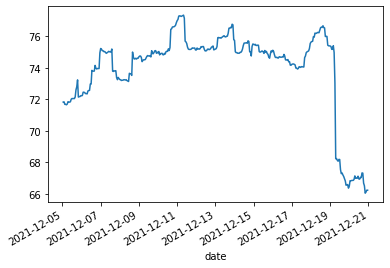

In [ ]:
volatility = getHistoricalVol('BTC')
volatility.head(100)
volatility.volatility.plot()
print(volatility.volatility[-1])


In [ ]:

def Volatilidad(dias=365,crypto="BTC",Utilidad="V"):
                  stock_symbol = crypto+"-USD"
                  end_time = date.today()
                  start_time = end_time - timedelta(days=dias)
                  end = end_time.strftime('%Y-%m-%d')
                  start = start_time.strftime('%Y-%m-%d')
                  json_prices = YahooFinancials(stock_symbol
                      ).get_historical_price_data(start, end, 'daily')
                  # transform json file to dataframe
                  prices = pd.DataFrame(json_prices[stock_symbol]
                      ['prices'])[['formatted_date', 'close']]
                  # sort dates in descending order
                  prices.sort_index(ascending=False, inplace=True)
                  # calculate daily logarithmic return
                  prices['returns'] = (np.log(prices.close /
                      prices.close.shift(-1)))
                  # calculate daily standard deviation of returns
                  daily_std = np.std(prices.returns)
                  std = daily_std * 252 ** 0.5
                  if Utilidad =="P":
                          # Plot histograms
                          fig, ax = plt.subplots(1, 1, figsize=(7, 5))
                          n, bins, patches = ax.hist(
                              prices.returns.values,
                              bins=50, alpha=0.65, color='blue')
                          ax.set_xlabel('log return of stock price')
                          ax.set_ylabel('frequency of log return')
                          ax.set_title('Historical Volatility for ' +
                              stock_symbol)

                          # get x and y coordinate limits
                          x_corr = ax.get_xlim()
                          y_corr = ax.get_ylim()

                          # make room for text
                          header = y_corr[1] / 5
                          y_corr = (y_corr[0], y_corr[1] + header)
                          ax.set_ylim(y_corr[0], y_corr[1])

                          # print historical volatility on plot
                          x = x_corr[0] + (x_corr[1] - x_corr[0]) / 30
                          y = y_corr[1] - (y_corr[1] - y_corr[0]) / 15
                          ax.text(x, y , 'Annualized Volatility: ' + str(np.round(std*100, 1))+'%',
                              fontsize=11, fontweight='bold')
                          x = x_corr[0] + (x_corr[1] - x_corr[0]) / 15
                          y -= (y_corr[1] - y_corr[0]) / 20

                          # save histogram plot of historical price volatility
                          fig.tight_layout()
                          fig.savefig('historical volatility.png')
                  else:
                          return(std)

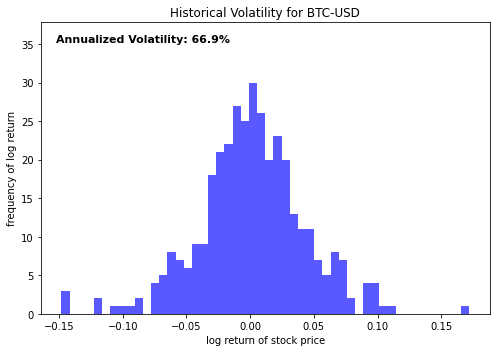

In [ ]:
Volatilidad(crypto="BTC",Utilidad="P")

#Black Scholes

In [ ]:
class Black:
  
  delta=[]
  k=[]
  i=[]
  CalloPut=1
  vto=[]
  volatilidad=[0.1]
  tipo=["Call"]
  def BSM(k=0,i=0,vto=0, CalloPut=1, utilidad="BS"):   
          import datetime
          if k ==0:
              precio_ejercicio =int(input("Introducir precio de ejercicio"))
          else:
              precio_ejercicio =k
          if i ==0:
            tasa_interes = int(input("Introducir tasa de interes libre de riesgo (en valor enter ej 13)"))/100
          else:
            tasa_interes = i
          if vto ==0:
            fecha_expiracion1 = input("Introducir fecha de vencimiento de la opcion (DD/MM/YYYY)")
          else:
            fecha_expiracion1 =vto
          if Black.volatilidad ==[0.1]:
            volatilidad = Volatilidad(crypto="BTC",Utilidad="V")
          else:
            volatilidad = Black.volatilidad
          try:
            fecha_expiracion = ql.Date(int(fecha_expiracion1[0:2]), int(fecha_expiracion1[3:5]),int(fecha_expiracion1[6:10]))
          except:
            print("Por favor primero elegir todos los imputs")
          if CalloPut ==-1:
            CalloPut=-1
          
          #Seteamos las variables que son datos de la web
          precio_activo = getprice("btc_usd")["estimated_delivery_price"]
          tasa_dividendos =  0.0 #tasa de dividendos anualizada (q)



          fecha_valuacion = ql.Date(datetime.datetime.today().day, datetime.datetime.today().month, datetime.datetime.today().year)
          ql.Settings.instance().evaluationDate = fecha_valuacion
          day_count = ql.Actual365Fixed()
          calendario = ql.UnitedStates()
          tipo_opcion = CalloPut #Tipo de opcion (CALL o PUT)
          payoff = ql.PlainVanillaPayoff(tipo_opcion, precio_ejercicio)
          ejercicio_europeo = ql.EuropeanExercise(fecha_expiracion)
          opcion_europea = ql.VanillaOption(payoff, ejercicio_europeo)
          S = ql.SimpleQuote(precio_activo)
          objeto_spot = ql.QuoteHandle(S)
          r = ql.SimpleQuote(tasa_interes)
          objeto_tasa_interes = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                                      ql.QuoteHandle(r), 
                                                                  day_count))
          q = ql.SimpleQuote(tasa_dividendos)
          objeto_tasa_dividendos = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                                ql.QuoteHandle(q), 
                                                                day_count))
          sigma = ql.SimpleQuote(volatilidad)
          objeto_volatilidad = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(fecha_valuacion, 
                                                                          calendario, 
                                                                          ql.QuoteHandle(sigma), 
                                                                      day_count))
          proceso_BSM = ql.BlackScholesMertonProcess(objeto_spot, 
                                                    objeto_tasa_dividendos, 
                                                    objeto_tasa_interes, 
                                                    objeto_volatilidad)
          modelo_BS = ql.AnalyticEuropeanEngine(proceso_BSM)
          opcion_europea.setPricingEngine(modelo_BS)
          precio_opcion_BS = opcion_europea.NPV()
          Black.delta = opcion_europea.delta()
          vega_BS = opcion_europea.vega()
          rho_BS = opcion_europea.rho() 
          theta_BS = opcion_europea.theta()
          thetaPD_BS = opcion_europea.thetaPerDay()
          strike_greek_BS = opcion_europea.strikeSensitivity()
          gamma_BS = opcion_europea.gamma()
          elasticity_BS = opcion_europea.elasticity()
          if utilidad == "E":
            print("El precio teorico usando el modelo de Black&Scholes es: ", precio_opcion_BS)
          return precio_opcion_BS
  def inputs():
    Black.k=int(input("Introducir precio de ejercicio"))
    Black.i=int(input("Introducir tasa de interes libre de riesgo (en valor enter ej 13)"))/100
    Black.vto= input("Introducir fecha de vencimiento de la opcion (DD/MM/YYYY)")
    Black.tipo =input("Call o Put").lower()
    if Black.tipo == "call":
      Black.CalloPut= 1
    if Black.tipo == "put":
      Black.CalloPut= -1

  

#Modelo del Arbol Binomial

In [ ]:
def Arbol(k,i,vto,volatilidad=0.1):
          import datetime
          cant_pasos_arbol = int(input("Cantidad de pasos del arbol (recomendado 5000)"))
          precio_ejercicio =k
          tasa_interes = i
          fecha_expiracion1 = vto
          fecha_expiracion = ql.Date(int(fecha_expiracion1[0:2]), int(fecha_expiracion1[3:5]),int(fecha_expiracion1[6:10]))
          #Seteamos las variables que son datos de la web
          precio_activo = getprice("btc_usd")["estimated_delivery_price"]
          if Black.volatilidad ==[0.1]:
            volatilidad = Volatilidad(crypto="BTC",Utilidad="V")
          else:
            volatilidad = Black.volatilidad
          tasa_dividendos =  0.0 #tasa de dividendos anualizada (q)
          modelo_arbol = 'LR'
          fecha_valuacion = ql.Date(datetime.datetime.today().day, datetime.datetime.today().month, datetime.datetime.today().year)
          ql.Settings.instance().evaluationDate = fecha_valuacion
          day_count = ql.Actual365Fixed()
          calendario = ql.UnitedStates()
          tipo_opcion = ql.Option.Call #Tipo de opcion (CALL o PUT)
          payoff = ql.PlainVanillaPayoff(tipo_opcion, precio_ejercicio)
          ejercicio_europeo = ql.EuropeanExercise(fecha_expiracion)
          opcion_europea = ql.VanillaOption(payoff, ejercicio_europeo)
          S = ql.SimpleQuote(precio_activo)
          objeto_spot = ql.QuoteHandle(S)
          r = ql.SimpleQuote(tasa_interes)
          objeto_tasa_interes = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                                      ql.QuoteHandle(r), 
                                                                  day_count))
          q = ql.SimpleQuote(tasa_dividendos)
          objeto_tasa_dividendos = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                                ql.QuoteHandle(q), 
                                                                day_count))
          sigma = ql.SimpleQuote(volatilidad)
          objeto_volatilidad = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(fecha_valuacion, 
                                                                          calendario, 
                                                                          ql.QuoteHandle(sigma), 
                                                                      day_count))
          proceso_BSM = ql.BlackScholesMertonProcess(objeto_spot, 
                                                    objeto_tasa_dividendos, 
                                                    objeto_tasa_interes, 
                                                    objeto_volatilidad)
          modelo_Bin = ql.BinomialVanillaEngine(proceso_BSM, 
                                                modelo_arbol, 
                                                cant_pasos_arbol)
          opcion_europea.setPricingEngine(modelo_Bin)
          precio_opcion_Bin = opcion_europea.NPV()



          print("El precio teorico usando el modelo Binomial es: ",  precio_opcion_Bin)

#Modelo Montecarlo

In [ ]:
def MC(vto,i,k):
          import datetime
          caminos = int(input("Cantidad de caminos para montecarlo (recomendado 50000)"))
          generador_numeros_aleatorios = "PseudoRandom" 
          pasos_tiempo=20
          precio_ejercicio =k
          tasa_interes = i
          fecha_expiracion1 = vto
          fecha_expiracion = ql.Date(int(fecha_expiracion1[0:2]), int(fecha_expiracion1[3:5]),int(fecha_expiracion1[6:10]))
          #Seteamos las variables que son datos de la web
          precio_activo = getprice("btc_usd")["estimated_delivery_price"]
          if Black.volatilidad ==[0.1]:
            volatilidad = Volatilidad(crypto="BTC",Utilidad="V")
          else:
            volatilidad = Black.volatilidad  #Volatilidad Implicita anualizada (sigma)
          tasa_dividendos =  0.0 #tasa de dividendos anualizada (q)
          modelo_arbol = 'MC'
          fecha_valuacion = ql.Date(datetime.datetime.today().day, datetime.datetime.today().month, datetime.datetime.today().year)
          ql.Settings.instance().evaluationDate = fecha_valuacion
          day_count = ql.Actual365Fixed()
          calendario = ql.UnitedStates()
          tipo_opcion = Black.CalloPut #Tipo de opcion (CALL o PUT)
          payoff = ql.PlainVanillaPayoff(tipo_opcion, precio_ejercicio)
          ejercicio_europeo = ql.EuropeanExercise(fecha_expiracion)
          opcion_europea = ql.VanillaOption(payoff, ejercicio_europeo)
          S = ql.SimpleQuote(precio_activo)
          objeto_spot = ql.QuoteHandle(S)
          r = ql.SimpleQuote(tasa_interes)
          objeto_tasa_interes = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                                      ql.QuoteHandle(r), 
                                                                  day_count))
          q = ql.SimpleQuote(tasa_dividendos)
          objeto_tasa_dividendos = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                                ql.QuoteHandle(q), 
                                                                day_count))
          sigma = ql.SimpleQuote(volatilidad)
          objeto_volatilidad = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(fecha_valuacion, 
                                                                          calendario, 
                                                                          ql.QuoteHandle(sigma), 
                                                                      day_count))
          proceso_BSM = ql.BlackScholesMertonProcess(objeto_spot, 
                                                    objeto_tasa_dividendos, 
                                                    objeto_tasa_interes, 
                                                    objeto_volatilidad)
          modelo_MC = ql.MCEuropeanEngine(proceso_BSM, 
                                generador_numeros_aleatorios, 
                                timeSteps = pasos_tiempo,
                                requiredSamples = caminos)
          opcion_europea.setPricingEngine(modelo_MC)
          precio_opcion_MC = opcion_europea.NPV()
          error_MC = opcion_europea.errorEstimate()
          print("Error del metodo de MonteCarlo: ", error_MC)


          print("El precio teorico usando el modelo de Monte Carlo es: ",  precio_opcion_MC)

#Comparar

In [ ]:
def comparar():
  import datetime
  strike2=int(input("introducir strike (multiplo de 1000)"))
  vto=input("Introducir vencimiento")
  tipo= input("Call o Put").lower()
  CalloPut=[]
  CalloPut2=[]
  fecha_expiracion = ql.Date(int(vto[0:2]), int(vto[3:5]),int(vto[6:10]))
  fecha_valuacion = ql.Date(datetime.datetime.today().day, datetime.datetime.today().month, datetime.datetime.today().year)
  dias= fecha_expiracion-fecha_valuacion
  if strike2 not in strike:
    print(strike)
    strike2= int(input("Elegir uno de los arriba mencionados"))
  if dias not in Dias1:
    print(Fechas)
    dias= input("Elegir una fecha validad")
  print(vto,dias)
  if tipo == "call":
      CalloPut= "C"
      CalloPut2=1
  if tipo == "put":
      CalloPut= "P"
      CalloPut2=-1
  Dias2=panel_limpio.Dias_al_VTO[panel_limpio.Dias_al_VTO == dias].index.tolist()  
  Strikes= panel_limpio.Strike[panel_limpio.Strike == strike2].index.tolist()
  tipo2= panel_limpio.Tipo[panel_limpio.Tipo == CalloPut].index.tolist()
  index=list(set(Dias2) & set(Strikes) &set(tipo2)).pop()
  a=panel_limpio['underlying_price'][index]*panel_limpio['mid_price'][index]
  BSM=Black.BSM(k=strike2,vto=vto,CalloPut=CalloPut2,i=0.13,utilidad="BS")
  print("El precio medio al cual se puede operar en Deribit es de "+str(a)+" Mientras que el precio teorico por B&S es de: "+str(BSM))






  

# Estrategias

In [ ]:
def protectiveput():
  S0=getprice("btc_usd")["estimated_delivery_price"]
  k=S0
  put = Black.BSM(k=k,i=Black.i,vto=Black.vto,CalloPut=-1)
  precio= getprice("btc_usd")["estimated_delivery_price"]
  payofftotal=[]
  precios= [35000,40000,45000,50000,55000,60000,65000,S0]
  precios.sort()
  payoff2=[]
  for i in precios:
    if i<=k:
      payofftotal.append(k-i-put+i-S0)
    if i>k:
      payofftotal.append(-put+i-S0)
  for i in precios:
    payoff2.append(i-S0)
  df = pd.DataFrame(list(zip(precios, payofftotal)),columns=["Precio", "Payoff"])
  df2 = pd.DataFrame(list(zip(precios, payoff2)),columns=["Precio", "Payoff"])
  plt.plot(df["Precio"],df["Payoff"],label='Protective put') 
  plt.plot(df2["Precio"],df2["Payoff"], '--',label='St') 
  plt.title("Protective put")
  plt.legend()
  
  print("""Consiste en combinar el subyasente con una opcion del tipo Put, de tal manera que el subyasente esta protegido por la opcion. 
  Sirve para acortar la perdida sin limitar el upside. En este caso, el stike es igual al precio del subyasente""")
  plt.show()

In [ ]:
def Topstradle():
  S0=getprice("btc_usd")["estimated_delivery_price"]
  k=S0
  put = Black.BSM(k=k,i=Black.i,vto=Black.vto,CalloPut=-1)
  call= Black.BSM(k=k,i=Black.i,vto=Black.vto,CalloPut=1)
  precio= getprice("btc_usd")["estimated_delivery_price"]
  payofftotal=[]
  precios= [30000,35000,40000,45000,50000,55000,60000,65000,70000,S0]
  precios.sort()
  
  for i in precios:
    if i<=k:
      payofftotal.append(i-k+put+call)
    if i>k:
      payofftotal.append(put+call +k-i)
  x0=-1*(-put -call-k)
  x1=-1*(-k+put+call)
  
  df = pd.DataFrame(list(zip(precios, payofftotal)),columns=["Precio", "Payoff"])
  df.plot(x="Precio",y="Payoff")
  plt.xticks([k,S0,x1,x0])
  plt.title("Top Stradle")
  print("""Es una estrategia que combina dos clases de opciones (Call y Put) La idea de esta estrategia es apostar a la lateralización, a la falta de volatilidad. 
  En ambas opciones, el strike es el precio del subyasente""")
  plt.show()


In [ ]:
def Bottomstradle():
  S0=getprice("btc_usd")["estimated_delivery_price"]
  k=S0
  put = Black.BSM(k=k,i=Black.i,vto=Black.vto,CalloPut=-1)
  call = Black.BSM(k=k,i=Black.i,vto=Black.vto,CalloPut=1)
  precio= getprice("btc_usd")["estimated_delivery_price"]
  payofftotal=[]
  precios= [30000,35000,40000,45000,50000,55000,60000,65000,70000,S0]
  precios.sort()
  
  for i in precios:
    if i<=k:
      payofftotal.append(-1*(i-k+put+call))
    if i>k:
      payofftotal.append(-1*(put+call +k-i))
  x0=-1*(-put -call-k)
  x1=-1*(-k+put+call)
  df = pd.DataFrame(list(zip(precios, payofftotal)),columns=["Precio", "Payoff"])
  df.plot(x="Precio",y="Payoff")
  plt.title("Bottom Stradle")
  plt.xticks([k,S0,x1,x0])
  print("""Es una estrategia que combina dos clases de opciones (Call y Put) La idea de esta estrategia es apostar a la volatilidad, a que el subyasente termine lejos del strike, ya sea al alza o a la baja. 
  En ambas opciones, el strike es el precio del subyasente""")
  plt.show()

In [ ]:
def moreisntbetter():
  import datetime
  S0=getprice("btc_usd")["estimated_delivery_price"]
  k=S0
  precioBSM = MIB.MoreISNOTbetter()
  precio= getprice("btc_usd")["estimated_delivery_price"]
  payofftotal=[]
  precios= [35000,40000,45000,50000,55000,60000,65000,70000]
  VN=100
  for i in precios:
    if i<=MIB.limitemin:
      payofftotal.append(VN)
    elif i<MIB.limitemax:
      payofftotal.append(VN*i/S0)
    else:
      payofftotal.append(VN*np.exp(MIB.i*MIB.vto))
  df = pd.DataFrame(list(zip(precios, payofftotal)),columns=["Precio", "Payoff"])
  df.plot(x="Precio",y="Payoff")
  plt.title("More Isn´t Better")
  print("El precio del bono es de:" + str(precioBSM))
  plt.show()

In [ ]:
def Topstrangle():
  S0=getprice("btc_usd")["estimated_delivery_price"]
  k1=S0*0.8
  k2=S0*1.2

  put = Black.BSM(k=k1,i=Black.i,vto=Black.vto,CalloPut=-1)
  call = Black.BSM(k=k2,i=Black.i,vto=Black.vto,CalloPut=1)
  precio= getprice("btc_usd")["estimated_delivery_price"]
  payofftotal=[]
  precios= [30000,35000,40000,45000,50000,55000,60000,65000,70000,k1,k2]
  precios.sort()
  
  for i in precios:
    if i<k1:
      payofftotal.append(i-k1+put+call)
    if i<=k2 and i>=k1:
      payofftotal.append(call+put)
    if i>k2:
      payofftotal.append(put+call +k2-i)
  df = pd.DataFrame(list(zip(precios, payofftotal)),columns=["Precio", "Payoff"])
  df.plot(x="Precio",y="Payoff")
  plt.title("Top Strangle")
  plt.xticks([k1,k2,S0])
  print("""La idea es similar al Top Stradle pero resignando un poco de ganancia maxima para apliar el rango en el cual el payoff es positivo.
          Los strikes utilizados son 80% y 120% del precio del subyasente""")
  plt.show()



In [ ]:
def Bottomstrangle():
  S0=getprice("btc_usd")["estimated_delivery_price"]
  k1=S0*0.8
  k2=S0*1.2

  put = Black.BSM(k=k1,i=Black.i,vto=Black.vto,CalloPut=-1)
  call = Black.BSM(k=k2,i=Black.i,vto=Black.vto,CalloPut=1)
  precio= getprice("btc_usd")["estimated_delivery_price"]
  payofftotal=[]
  precios= [30000,35000,40000,45000,50000,55000,60000,65000,70000,k1,k2]
  precios.sort()
  
  for i in precios:
    if i<k1:
      payofftotal.append(-1*(i-k1+put+call))
    if i<=k2 and i>=k1:
      payofftotal.append(-1*(put+call))
    if i>k2:
      payofftotal.append(-1*(put+call +k2-i))
  df = pd.DataFrame(list(zip(precios, payofftotal)),columns=["Precio", "Payoff"])
  df.plot(x="Precio",y="Payoff")
  plt.title("Bottom Strangle")
  plt.xticks([k1,k2,S0])
  print("""La idea es similar al Bottom Stradle pero resignando parte del rango en el cual el payoff es positivo para que la perdida maxima sea menor.
          Los strikes utilizados son 80% y 120% del precio del subyasente""")
  plt.show()

In [ ]:
def collar():
  S0=getprice("btc_usd")["estimated_delivery_price"]
  k1=S0
  k2=S0*1.3
  put = Black.BSM(k=k1,i=Black.i,vto=Black.vto,CalloPut=-1)
  call = Black.BSM(k=k2,i=Black.i,vto=Black.vto,CalloPut=1)
  precio= getprice("btc_usd")["estimated_delivery_price"]
  payofftotal=[]
  precios= [45000,50000,55000,60000,65000,70000,k1,k2]
  precios.sort()
  for i in precios:
    if i<k1:
      payofftotal.append(k1-i-put+i-S0+call)
    if i>=k1 and i<=k2:
      payofftotal.append(-put+i-S0+call)
    if i>k2:
      payofftotal.append(-put+i-S0+call +k2-i)
  df = pd.DataFrame(list(zip(precios, payofftotal)),columns=["Precio", "Payoff"])
  df.plot(x="Precio",y="Payoff")
  plt.xticks([k1,k2,S0*1.15])
  plt.title("Protective put")
  print(k1,k2, precios)
  plt.show()

# More isn´t Better


In [ ]:
    
def ND1():    
    
      terminoln=MIB.limitemin/(MIB.S0*np.exp(MIB.rf*MIB.vto))
      D1= (np.log(terminoln)- (MIB.rf-pow(MIB.volatilidad,2)/2)*MIB.vto)/(MIB.volatilidad*pow(MIB.vto,0.5))
      ND1 = norm().cdf(D1)
      return ND1

In [ ]:
        
def ND2():        
          terminoln=MIB.limitemax/(MIB.S0*np.exp(MIB.rf*MIB.vto))
          D2= (np.log(terminoln)- (MIB.rf+pow(MIB.volatilidad,2)/2)*MIB.vto)/(MIB.volatilidad*pow(MIB.vto,0.5))
          ND2 = norm().cdf(D2)
          return ND2

In [ ]:
def ND3():  
        #D3=D1-volatilidad*pow(vto,0.5)
        terminoln=MIB.limitemin/(MIB.S0*np.exp(MIB.rf*MIB.vto))

        D3=(np.log(terminoln)- (MIB.rf+pow(MIB.volatilidad,2)/2)*MIB.vto)/(MIB.volatilidad*pow(MIB.vto,0.5)) 

        ND3 = norm().cdf(D3)
        return ND3


In [ ]:
def ND4():
        terminoln= (MIB.S0*np.exp(MIB.rf*MIB.vto)/MIB.limitemax)

        D4=(np.log(terminoln) + (MIB.rf-pow(MIB.volatilidad,2)/2)*MIB.vto)/(MIB.volatilidad*pow(MIB.vto,0.5))
        #D4= -D2-MIB.volatilidad*pow(vto,0.5)
        ND4 = norm().cdf(D4)
        return ND4

In [ ]:
class MIB():
          S0=[]
          limitemin=[]
          limitemax=[]
          vto=[]
          i=[]
          rf=[]
          volatilidad=[]
          def MoreISNOTbetter():
                  import datetime
                  MIB.S0 = getprice("btc_usd")["estimated_delivery_price"] #Spot (S)
                  MIB.limitemin = int(input("Introducir limite inferior"))#Strike (K)
                  MIB.limitemax= int(input("Introducir limite Superior"))
                  vto= input("Introducir fecha de vto (DD/MM/YYYY)")
                  MIB.i = int(input("Introducir tasa de interes (pagada si supera lim sup) en numero entero"))/100 #tasa que se paga si ST>limitemax 
                  MIB.rf =int(input("Introducir tasa libre de riesgo en numero entero"))/100 #tasa libre de riesgo anualizada (r)
                  MIB.volatilidad = pow(0.751,0.5) #volatility.volatility[-1]/100  #Volatilidad Implicita anualizada (sigma)
                  fecha_expiracion = ql.Date(int(vto[0:2]), int(vto[3:5]),int(vto[6:10]))
                  fecha_valuacion = ql.Date(datetime.datetime.today().day, datetime.datetime.today().month, datetime.datetime.today().year)
                  tasa_dividendos =  0.0 #tasa de dividendos anualizada (q)
                  VN = 100
                  MIB.vto = (fecha_expiracion-fecha_valuacion)/365
                  F= VN*np.exp(-MIB.rf*MIB.vto)*ND1()+VN*np.exp(MIB.rf*MIB.vto)*(ND2()-ND3())+VN*np.exp(MIB.i*MIB.vto)*ND4()
                  return F


#Chooser

In [ ]:
def chooser():
        ck=input("strike call")
        vto=(input("Vto Chooser (DD/MM/YYYY)"))
        pk=input("Strike Put")
        choosedate=input("Fecha de elección")
        i=int(input("poner tasa de interes en numero entero"))/100
        vto1 =ql.Date(int(vto[0:2]), int(vto[3:5]),int(vto[6:10]))
        choosedate1 = ql.Date(int(choosedate[0:2]), int(choosedate[3:5]),int(choosedate[6:10])) 
        fecha_valuacion = ql.Date(datetime.datetime.today().day, datetime.datetime.today().month, datetime.datetime.today().year)     
        Call = BSM(k=int(ck),vto=vto, i=i)
        Put= BSM(k=int(pk)*np.exp(-1*i*((vto1-choosedate1)/365)),vto=choosedate,CalloPut=-1, i=i)
        Chooser= (Call+Put)*np.exp(-1*i*((choosedate1-fecha_valuacion)/365))
        print("el precio de la opcion ex es", Chooser)



# Menu

In [ ]:
class Menu:
        def __init__(self):
                self.elecciones = {
                        "1": Black.inputs,
                        "2": self.BSM,
                        "3": self.Arbol,
                        "4": self.MC,
                        "5": self.comparar,
                        "0": self.quit,
                        "1A": Black.inputs,
                        "1B": self.volatilidad,
                        "1C": self.rf,
                        "1D": self.strike,
                        "1E": self.vto,
                        "1F": self.CalloPut,
                        "1G": self.mostrar,
                        "6A": protectiveput,
                        "6B": Topstradle,
                        "6C": Bottomstradle,
                        "6D": moreisntbetter,
                        "6E": self.todos

                                       }
        def mostrar_menu(self):
            print("""
		               Menu Cuaderno

                1 Elegir inputs
                2 Black&scholes&Merton
                3 Arbol binomial
                4 Monte Carlo
                5 Comparar
                6 Estrategias
                0 Salir
                
                
                """)
        def mostrar_inputs(self):
            print("""
		               Menu Cuaderno
                A. Modificar todos los inputs
                B. Modificar volatilidad
                C. Modificar tasa libre de riesgo
                D. Modificar strike
                E. Modificar vencimiento  
                F. Modificar tipo de opcion 
                G. Mostrar inputs elegidos
                H. Atras

                
                """)
        def mostrar_estrategias(self):
            print("""
		               Menu Cuaderno
              A. Protective Put
              B. Top Straddle
              C. Bottom Stradle
              D. More isn´t better
              E. Todos
              F. Atras

                
                """)

        def BSM(self):
          Black.BSM(k=Black.k,i=Black.i,vto=Black.vto,CalloPut=Black.CalloPut, utilidad="E")
        def Arbol(self):
          Arbol(Black.k,Black.i,Black.vto)
        def MC(self):
          MC(k=Black.k,i=Black.i,vto=Black.vto)
        def comparar(self):
          comparar()
        def strike(Self):
          Black.k=int(input("intoducir s1trike"))
        def volatilidad(Self):
          Black.volatilidad=int(input("intoducir volatilidad"))/100
        def rf(Self):
          Black.i=int(input("intoducir tasa de interes"))
        def vto(Self):
          Black.vto=input("intoducir vto")
        def CalloPut(self):
              Black.tipo =input("Call o Put").lower()    
              if Black.tipo == "call":
                Black.CalloPut= 1
              if Black.tipo == "put":
                Black.CalloPut= -1
        def mostrar(Self):
          print("strike: " + str(Black.k),"Volatilidad: " + str(Black.volatilidad),"Tasa de interes: " + str(Black.i),"Vencimiento: "+Black.vto,"Es del tipo" + str(Black.tipo))

        def todos(self):  
                
                protectiveput()
                Bottomstrangle()
                Topstrangle()
                Bottomstradle()
                Topstradle()
                collar()
                               






        def  run(self):
                           while True:
                                    self.mostrar_menu()
                                    eleccion = input("Escribe una opcion:")
                                    while eleccion ==str(1):
                                      self.mostrar_inputs()
                                      eleccion = eleccion + input("Escribe una opcion:")
                                    while eleccion ==str(6):
                                      self.mostrar_estrategias()
                                      eleccion = eleccion + input("Escribe una opcion:")
                                    accion = self.elecciones.get(eleccion)
                                    if accion:
                                                    accion()   

                                    elif len(eleccion)==2:
                                        True
                                    else:
                                                  print ("{0} no es una eleccion valida".format(eleccion))

                    
                                            

            

        def quit(self):
                                print("gracias por su atención")
                                sys.exit(0) 

In [ ]:
import datetime
import QuantLib

In [ ]:
Menu().run()




		               Menu Cuaderno

                1 Elegir inputs
                2 Black&scholes&Merton
                3 Arbol binomial
                4 Monte Carlo
                5 Comparar
                6 Estrategias
                0 Salir
                
                
                
